In [1]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')



In [2]:
#Read data from csv
rawdata = pd.read_csv('telecom_churn_data.csv', sep=',', encoding='ISO-8859-1')
rawdata.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [3]:

#Get columns in the dataframe
rawdata.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [4]:
rawdata.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'},inplace=True)

In [5]:

#Lets get the distribution of numeric data all the columns. 
rawdata.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon      vbc_3g_8      vbc_3g_7  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

           vbc_3g_6      vbc_3g_9  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [6]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
#Get the null % of all the columns
(rawdata.isnull().sum()/len(rawdata.index))*100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

We need high value customer-feature will play this role are :total_rech_amt,av_rech_amt_data and total_rech_data

#total_rech_amt-No null value
But, Null value present in both #av_rech_amt_data and #total_rech_data columns. 

In [8]:
#lets look at these null colmns.
rawdata[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9']].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
total_rech_amt_9    0
dtype: int64

In [9]:

rawdata[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].isnull().sum()

av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64

In [10]:
rawdata[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].isnull().sum()

total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64

av_rech_amt_data indicates average recharge amount of data 
while total_rech_data represents recharge done or not done.
They have same percentage of null values, lets impute them with 0's

In [11]:
#Fill missing values to filter high value customers
need_zero_filling_list=['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
                        'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']
rawdata[need_zero_filling_list]=rawdata[need_zero_filling_list].fillna(0, axis=1)

In [12]:
# checking filled with zer or not
rawdata[need_zero_filling_list].isnull().sum()

av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
dtype: int64

Lets filter the high value customers from the original set who have recharged with an amount more than or equal to X,
where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:
#Get the top 30% customers based on the sum of recharges in month 6 and 7
high_value_cust=rawdata[rawdata[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)> 
                        rawdata[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [14]:
high_value_cust.shape

(29949, 226)

In [15]:
#Unnderstand the no of datapoints, column and column types
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(12)
memory usage: 51.9+ MB


In [16]:
#Get the string columns in the data frame
str_cols = high_value_cust.select_dtypes(['object'])
str_cols.head()
#Strip the leading and trailing whitespaces
high_value_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())

In [17]:

#Convert all the string columns to upper case
high_value_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())

In [18]:

#Get no of unique mobile numbers, this is an id column
len(high_value_cust['mobile_number'].unique())

29949

In [19]:
#Get null% of all columns
high_value_cust.isnull().sum()/len(high_value_cust.index)*100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.744599
std_og_t2o_mou           0.744599
loc_ic_t2o_mou           0.744599
last_date_of_month_6     0.000000
last_date_of_month_7     0.093492
last_date_of_month_8     0.517546
last_date_of_month_9     1.185348
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              1.649471
onnet_mou_7              1.622759
onnet_mou_8              3.626164
onnet_mou_9              6.063642
offnet_mou_6             1.649471
offnet_mou_7             1.622759
offnet_mou_8             3.626164
offnet_mou_9             6.063642
roam_ic_mou_6            1.649471
roam_ic_mou_7            1.622759
roam_ic_mou_8            3.626164
roam_ic_mou_9            6.063642
roam_og_mou_6            1.649471
roam_og_mou_7            1.622759
roam_og_mou_8            3.626164
roam_og_mou_9            6.063642
loc_og_t2t_mou

In [20]:
# Driving churn

In [21]:
#Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' should be 0
#i.e vol_3g_mb_9'+ 'vol_2g_mb_9'+'total_ic_mou_9'+'total_og_mou_9=0 means user has churned.

high_value_cust['churn']=high_value_cust[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) 
                                                                                                                                 &
                                                                                                        (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [22]:
high_value_cust['churn'].value_counts()

0    27498
1     2451
Name: churn, dtype: int64

In [23]:
#Get only the data where the customers churned
churned_total = high_value_cust[high_value_cust['churn']==1]
len(churned_total)

2451

In [24]:
#No of non churned customers
len(high_value_cust[high_value_cust['churn']==0])

27498

In [25]:
churned_total.shape

(2451, 227)

In [26]:
high_value_cust=high_value_cust.drop(high_value_cust.filter(regex='_9|sep', axis = 1).columns,axis=1)

In [27]:
high_value_cust.shape

(29949, 172)

In [28]:
(churned_total.isnull().sum()/len(churned_total.index))*100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           3.753570
std_og_t2o_mou           3.753570
loc_ic_t2o_mou           3.753570
last_date_of_month_6     0.000000
last_date_of_month_7     1.142391
last_date_of_month_8     6.323949
last_date_of_month_9    14.483884
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              6.160751
onnet_mou_7              8.037536
onnet_mou_8             30.518156
onnet_mou_9             64.463484
offnet_mou_6             6.160751
offnet_mou_7             8.037536
offnet_mou_8            30.518156
offnet_mou_9            64.463484
roam_ic_mou_6            6.160751
roam_ic_mou_7            8.037536
roam_ic_mou_8           30.518156
roam_ic_mou_9           64.463484
roam_og_mou_6            6.160751
roam_og_mou_7            8.037536
roam_og_mou_8           30.518156
roam_og_mou_9           64.463484
loc_og_t2t_mou

The data columns are having high percentage of null values for churned customers wheareas call columns are having low percentage of null values. It could mean most customers are using the mobile service for calls rather than data. Since majority of the columns are having null values we cannot simply drop them. We cant drop the rows as this would further diminish minority class. Before imputingthe values lets look at all the columns having null values

In [29]:
#Get the dat of all the rows with null values in more than 40 columns
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
77        7001328263        109             0.0             0.0   
111       7001300706        109             0.0             0.0   
188       7000340381        109             0.0             0.0   
539       7000670087        109             0.0             0.0   
578       7000248548        109             0.0             0.0   
687       7001662284        109             NaN             NaN   
690       7000185697        109             0.0             0.0   
723       7000684775        109             0.0             0.0   
788       7000636808        109             0.0             0.0   
845       7000945323        109             0.0             0.0   
895       7000436570        109             0.0             0.0   
1138      7000069975        109             0.0             0.0   
1187      7000486275        109             0.0             0.0   
1489      7002056402        109             0.0             0.0   
1524      7001790424        109             0.0             0.0   
1555      7002024450        109             0.0             0.0   
1768      7000126448        109             0.0             0.0   
1802      7000516213        109             0.0             0.0   
1952      7001545189        109             0.0             0.0   
2185      7000237332        109             NaN             NaN   
2218      7001005804        109             0.0             0.0   
2285      7000278047        109             0.0             0.0   
2714      7001800602        109             0.0             0.0   
2719      7002002857        109             0.0             0.0   
2750      7001245858        109             0.0             0.0   
3154      7000606599        109             NaN             NaN   
3290      7000679545        109             0.0             0.0   
3406      7000019100        109             0.0             0.0   
3444      7000747251        109             0.0             0.0   
...              ...        ...             ...             ...   
97307     7000421297        109             0.0             0.0   
97386     7000382026        109             0.0             0.0   
97449     7001878361        109             0.0             0.0   
97558     7000812276        109             0.0             0.0   
97608     7000444267        109             NaN             NaN   
97749     7000836304        109             0.0             0.0   
97804     7002369377        109             NaN             NaN   
97850     7001683776        109             0.0             0.0   
97950     7001026796        109             0.0             0.0   
98024     7000196939        109             0.0             0.0   
98121     7001800732        109             0.0             0.0   
98271     7001276078        109             0.0             0.0   
98317     7001377657        109             0.0             0.0   
98420     7001912892        109             0.0             0.0   
98612     7000928707        109             0.0             0.0   
98635     7000004354        109             0.0             0.0   
98790     7000445861        109             0.0             0.0   
98872     7000010637        109             0.0             0.0   
98943     7000806379        109             NaN             NaN   
98962     7001181380        109             0.0             0.0   
99059     7000352903        109             0.0             0.0   
99070     7000236767        109             0.0             0.0   
99142     7000516319        109             0.0             0.0   
99246     7001682578        109             0.0             0.0   
99296     7002338051        109             0.0             0.0   
99323     7000365295        109             0.0             0.0   
99611     7000419422        109             0.0             0.0   
99790     7000008246        109             0.0       

In [30]:
#Lets see which columns are null when 'date_of_last_rech_data_6' are null
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40].columns[high_value_cust[pd.isnull
                                                        (high_value_cust['date_of_last_rech_data_6'])].isnull().all()].tolist()

['date_of_last_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6']

In [31]:

#Lets see which columns are null when 'date_of_last_rech_data_7' are null
high_value_cust[high_value_cust.isnull().sum(axis=1)>=40].columns[high_value_cust[pd.isnull
                                                        (high_value_cust['date_of_last_rech_data_7'])].isnull().all()].tolist()

['date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7']

In [32]:
####Dealing with null value in date columns

#checking date has null value or not
print(high_value_cust['last_date_of_month_6'].isnull().value_counts())
print(high_value_cust['last_date_of_month_7'].isnull().value_counts())
print(high_value_cust['last_date_of_month_8'].isnull().value_counts())

False    29949
Name: last_date_of_month_6, dtype: int64
False    29921
True        28
Name: last_date_of_month_7, dtype: int64
False    29794
True       155
Name: last_date_of_month_8, dtype: int64


In [33]:
#filling date with the date other rows have
#The last date of month columns are having null values and the columns have same value for each month respectively so they cn be easily imputed
high_value_cust['last_date_of_month_6'] = high_value_cust['last_date_of_month_6'].fillna('6/30/2014')
high_value_cust['last_date_of_month_7'] = high_value_cust['last_date_of_month_7'].fillna('7/31/2014')
high_value_cust['last_date_of_month_8'] = high_value_cust['last_date_of_month_8'].fillna('8/31/2014')

''' These are the date columns  which have null values- we willfill  any date before June
which will show user has not recharged in 6,7,8,9 month

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
high_value_cust['last_date_of_month_8'] = high_value_cust['last_date_of_month_8'].fillna('8/31/2014')
'''

high_value_cust['date_of_last_rech_data_6'] = high_value_cust['date_of_last_rech_data_6'].fillna('5/20/2014')
high_value_cust['date_of_last_rech_data_7'] = high_value_cust['date_of_last_rech_data_7'].fillna('5/20/2014')
high_value_cust['date_of_last_rech_data_8'] = high_value_cust['date_of_last_rech_data_8'].fillna('5/20/2014')

high_value_cust['date_of_last_rech_6'] = high_value_cust['date_of_last_rech_6'].fillna('5/20/2014')
high_value_cust['date_of_last_rech_7'] = high_value_cust['date_of_last_rech_7'].fillna('5/20/2014')
high_value_cust['date_of_last_rech_8'] = high_value_cust['date_of_last_rech_8'].fillna('5/20/2014')


#convert all date columns to datetime


high_value_cust['last_date_of_month_6'] = pd.to_datetime(high_value_cust['last_date_of_month_6'])
high_value_cust['last_date_of_month_7'] = pd.to_datetime(high_value_cust['last_date_of_month_7'])
high_value_cust['last_date_of_month_8'] = pd.to_datetime(high_value_cust['last_date_of_month_8'])

high_value_cust['date_of_last_rech_data_6'] = pd.to_datetime(high_value_cust['date_of_last_rech_data_6'])
high_value_cust['date_of_last_rech_data_7'] = pd.to_datetime(high_value_cust['date_of_last_rech_data_7'])
high_value_cust['date_of_last_rech_data_8'] = pd.to_datetime(high_value_cust['date_of_last_rech_data_8'])

high_value_cust['date_of_last_rech_6'] = pd.to_datetime(high_value_cust['date_of_last_rech_6'])
high_value_cust['date_of_last_rech_7'] = pd.to_datetime(high_value_cust['date_of_last_rech_7'])
high_value_cust['date_of_last_rech_8'] = pd.to_datetime(high_value_cust['date_of_last_rech_8'])


In [34]:


#Transform the existing date of last recharge columns with 1 indicating a recharge and 0 indicating no recharge
dateColumnsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                          'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[dateColumnsToTransform].applymap(lambda x: -1 if pd.isnull(x) else 1)

In [35]:
#Convert the features to category
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8']].apply(lambda x: x.astype('category'))


In [36]:
#Lets look at the columns we created
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]].head()

rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7 rech_data_8
0           1          1          1           1           1           1
7           1          1          1           1           1           1
8           1          1          1           1           1           1
16          1          1          1           1           1           1
21          1          1          1           1           1           1

In [37]:
#check the remaining null values once more

high_value_cust.isnull().sum()/len(high_value_cust.index) *100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.744599
std_og_t2o_mou           0.744599
loc_ic_t2o_mou           0.744599
last_date_of_month_6     0.000000
last_date_of_month_7     0.000000
last_date_of_month_8     0.000000
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              1.649471
onnet_mou_7              1.622759
onnet_mou_8              3.626164
offnet_mou_6             1.649471
offnet_mou_7             1.622759
offnet_mou_8             3.626164
roam_ic_mou_6            1.649471
roam_ic_mou_7            1.622759
roam_ic_mou_8            3.626164
roam_og_mou_6            1.649471
roam_og_mou_7            1.622759
roam_og_mou_8            3.626164
loc_og_t2t_mou_6         1.649471
loc_og_t2t_mou_7         1.622759
loc_og_t2t_mou_8         3.626164
loc_og_t2m_mou_6         1.649471
loc_og_t2m_mou_7         1.622759
loc_og_t2m_mou_8         3.626164
loc_og_t2f_mou

In [38]:

#Get the info of the dateframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 178 entries, mobile_number to rech_data_8
dtypes: category(6), datetime64[ns](9), float64(135), int64(28)
memory usage: 39.7 MB


#### Driving new Features

In [39]:
#Lets get the info of all columns
high_value_cust.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.994900e+04    29949.0         29726.0         29726.0   
mean    7.001216e+09      109.0             0.0             0.0   
std     6.867758e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000631e+09      109.0             0.0             0.0   
50%     7.001221e+09      109.0             0.0             0.0   
75%     7.001806e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29726.0  29949.000000  29949.000000  29949.000000  29455.000000   
mean              0.0    577.006877    578.921924    525.105455    281.138675   
std               0.0    449.261901    469.335744    496.373165    463.649942   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    345.808000    347.071000    266.252000     29.030000   
50%               0.0    490.933000    489.043000    443.470000    106.610000   
75%               0.0    702.776000    700.512000    666.980000    325.685000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  29463.000000  ...  29949.000000  29949.000000  14875.000000   
mean     289.194988  ...      0.195032      0.175565      0.920067   
std      485.661082  ...      1.043847      1.037672      0.271198   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%       27.860000  ...      0.000000      0.000000      1.000000   
50%      104.180000  ...      0.000000      0.000000      1.000000   
75%      330.335000  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     35.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon      vbc_3g_8      vbc_3g_7  \
count  15134.000000  14444.000000  29949.000000  29949.000000  29949.000000   
mean       0.914563      0.880296   1244.347958    164.539175    173.749613   
std        0.279540      0.324626    970.958900    419.712551    444.482427   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    469.000000      0.000000      0.000000   
50%        1.000000      1.000000    884.000000      0.000000      0.000000   
75%        1.000000      1.000000   1864.000000    104.960000    109.700000   
max        1.000000      1.000000   4321.000000  12916.220000   9165.600000   

           vbc_3g_6         churn  
count  29949.000000  29949.000000  
mean     153.984264      0.081839  
std      416.280454      0.274124  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%       75.270000      0.000000  
max    11166.210000      1.000000  

[8 rows x 163 columns]

In [40]:
#Get all the null columns
null_cols=high_value_cust.columns[high_value_cust.isnull().any()].tolist()
null_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_

In [41]:
high_value_cust.shape

(29949, 178)

In [42]:
#Date columns to list
datecols=['date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9',
'last_date_of_month_9']

In [43]:
high_value_cust.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Data columns (total 178 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2

In [44]:
#Get all float columns
high_value_cust.select_dtypes(include=['float64']).columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [45]:
#Get all int columns
high_value_cust.select_dtypes(include=['int64']).columns.tolist()

['mobile_number',
 'circle_id',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'churn']

In [46]:
#Get all int columns
high_value_cust.select_dtypes(include=['object']).columns.tolist()

[]

In [47]:
#Get all data columns to impute
columnstoImpute = ['total_rech_data_6'           
,'total_rech_data_7'           
,'total_rech_data_8'           
,'max_rech_data_6'             
,'max_rech_data_7'             
,'max_rech_data_8'                          
,'count_rech_2g_6'             
,'count_rech_2g_7'             
,'count_rech_2g_8'                         
,'count_rech_3g_6'             
,'count_rech_3g_7'             
,'count_rech_3g_8'                          
,'av_rech_amt_data_6'          
,'av_rech_amt_data_7'          
,'av_rech_amt_data_8'                    
,'arpu_3g_6'                   
,'arpu_3g_7'                   
,'arpu_3g_8'                                      
,'arpu_2g_6'                   
,'arpu_2g_7'                   
,'arpu_2g_8'                  
]

In [48]:
#Impute the null values with 0 for all data columns
high_value_cust[columnstoImpute] = high_value_cust[columnstoImpute].fillna(0, axis=1)

In [49]:

#Recheck the null percentage
high_value_cust.isnull().sum()/len(high_value_cust.index)*100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.744599
std_og_t2o_mou           0.744599
loc_ic_t2o_mou           0.744599
last_date_of_month_6     0.000000
last_date_of_month_7     0.000000
last_date_of_month_8     0.000000
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              1.649471
onnet_mou_7              1.622759
onnet_mou_8              3.626164
offnet_mou_6             1.649471
offnet_mou_7             1.622759
offnet_mou_8             3.626164
roam_ic_mou_6            1.649471
roam_ic_mou_7            1.622759
roam_ic_mou_8            3.626164
roam_og_mou_6            1.649471
roam_og_mou_7            1.622759
roam_og_mou_8            3.626164
loc_og_t2t_mou_6         1.649471
loc_og_t2t_mou_7         1.622759
loc_og_t2t_mou_8         3.626164
loc_og_t2m_mou_6         1.649471
loc_og_t2m_mou_7         1.622759
loc_og_t2m_mou_8         3.626164
loc_og_t2f_mou

night_pack_user and fb_user are categorical variables where 1 indicates usage of the service and null indicates no usage. Lets impute the missing values with -1 and convert the type to category

In [50]:
#Impute the missing values and convert the features to category
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]]=high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].applymap(lambda x: -1 if pd.isnull(x) else 1)
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]] = high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].apply(lambda x: x.astype('category'))

In [51]:

high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                -1               -1               -1        -1        -1   
8                -1                1                1        -1         1   
16               -1               -1               -1        -1        -1   
21               -1               -1               -1        -1        -1   

   fb_user_8  
0          1  
7         -1  
8          1  
16        -1  
21        -1

In [52]:
#Recheck the null percentage
high_value_cust.isnull().sum()/len(high_value_cust.index)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.744599
std_og_t2o_mou          0.744599
loc_ic_t2o_mou          0.744599
last_date_of_month_6    0.000000
last_date_of_month_7    0.000000
last_date_of_month_8    0.000000
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             1.649471
onnet_mou_7             1.622759
onnet_mou_8             3.626164
offnet_mou_6            1.649471
offnet_mou_7            1.622759
offnet_mou_8            3.626164
roam_ic_mou_6           1.649471
roam_ic_mou_7           1.622759
roam_ic_mou_8           3.626164
roam_og_mou_6           1.649471
roam_og_mou_7           1.622759
roam_og_mou_8           3.626164
loc_og_t2t_mou_6        1.649471
loc_og_t2t_mou_7        1.622759
loc_og_t2t_mou_8        3.626164
loc_og_t2m_mou_6        1.649471
loc_og_t2m_mou_7        1.622759
loc_og_t2m_mou_8        3.626164
loc_og_t2f_mou_6        1.649471
          

In [53]:
#Impute 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' columns with 0's
high_value_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = high_value_cust[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].fillna(0, axis=1)

In [54]:
#Get the info of the dataframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 178 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(129), int64(28)
memory usage: 38.5 MB


In [55]:
#Recheck the null percentage
high_value_cust.isnull().sum()/len(high_value_cust.index)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.000000
last_date_of_month_8    0.000000
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             1.649471
onnet_mou_7             1.622759
onnet_mou_8             3.626164
offnet_mou_6            1.649471
offnet_mou_7            1.622759
offnet_mou_8            3.626164
roam_ic_mou_6           1.649471
roam_ic_mou_7           1.622759
roam_ic_mou_8           3.626164
roam_og_mou_6           1.649471
roam_og_mou_7           1.622759
roam_og_mou_8           3.626164
loc_og_t2t_mou_6        1.649471
loc_og_t2t_mou_7        1.622759
loc_og_t2t_mou_8        3.626164
loc_og_t2m_mou_6        1.649471
loc_og_t2m_mou_7        1.622759
loc_og_t2m_mou_8        3.626164
loc_og_t2f_mou_6        1.649471
          

In [56]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 178 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(129), int64(28)
memory usage: 38.5 MB


In [57]:
     #Exclude the date and category columns from the dataset and impute with 0
high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = \
high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [58]:
#pd.set_option("display.max_columns",300)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [59]:
#Recheck the null percentage
print(high_value_cust.isnull().sum()/len(high_value_cust.index)*100)

mobile_number               0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t

In [60]:
#checking if any columns has null value or not 
null_cols=high_value_cust.columns[high_value_cust.isnull().any()].tolist()
null_cols

[]

In [61]:
#Data Preparation Part End 

## EDA PART

In [62]:
high_value_cust['churn'].value_counts()

0    27498
1     2451
Name: churn, dtype: int64

The flags 0 & 1 are Non-churn and churn respectively. We can clearly see that the churn customers are ~19% only. So, we can infer that the dataset is an imbalanced one

Text(0.5, 1.0, 'Churn status Distribution')

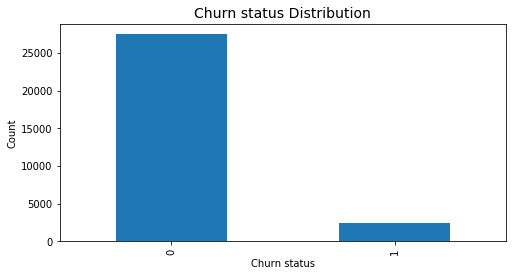

In [63]:
plt.figure(figsize=(8,4))
high_value_cust['churn'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

In [64]:
plt.show()

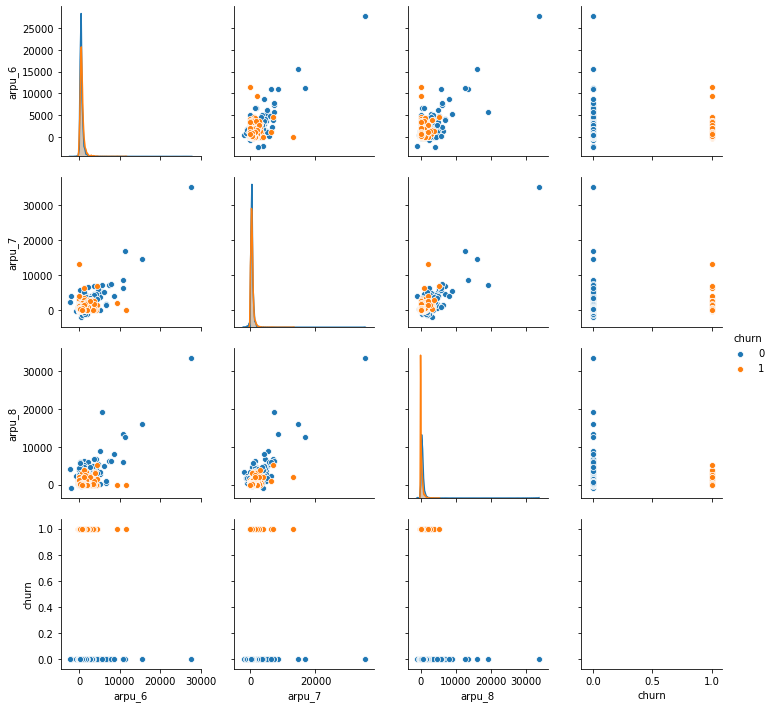

In [65]:

sns.pairplot(data=high_value_cust[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

In [66]:
plt.show()

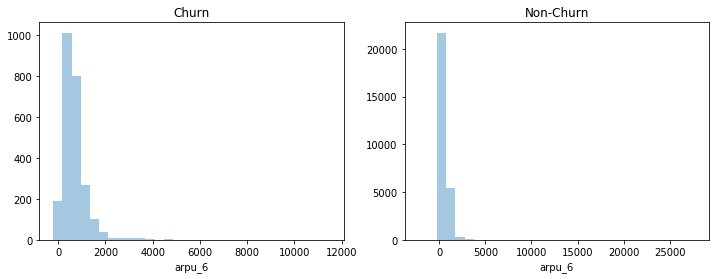

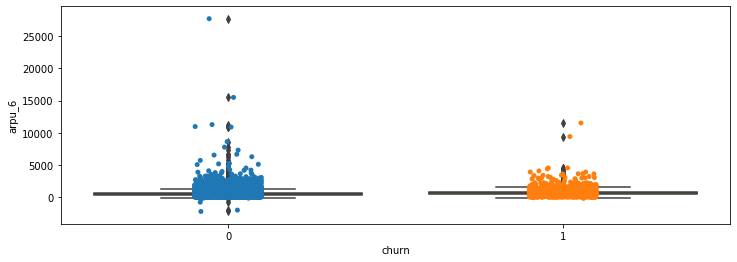

In [67]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_6', data=high_value_cust)
sns.stripplot(x='churn', y='arpu_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [68]:
plt.show()

##### onnet_mou (On network/ within the same network usage)

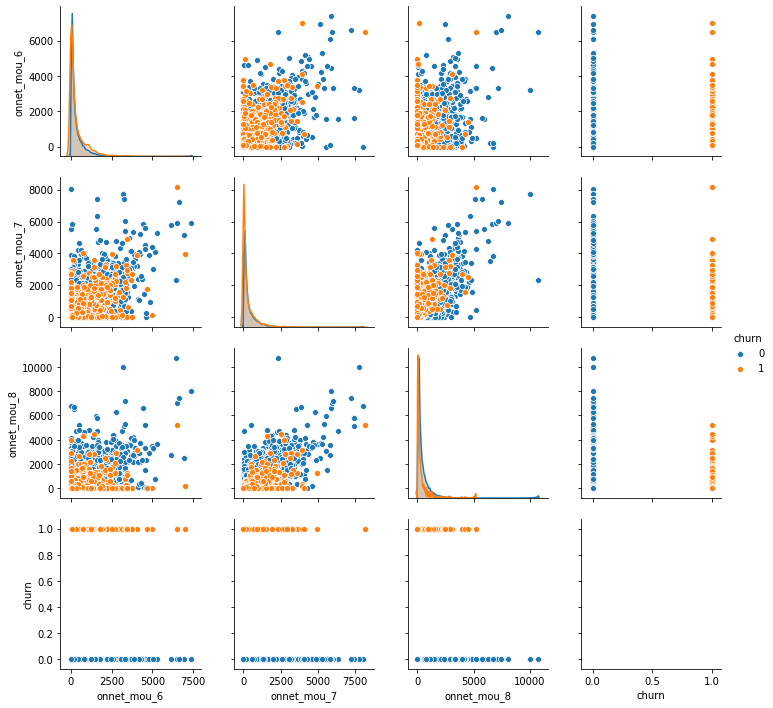

In [69]:
sns.pairplot(data=high_value_cust[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']] ,hue='churn')

In [70]:
plt.show()

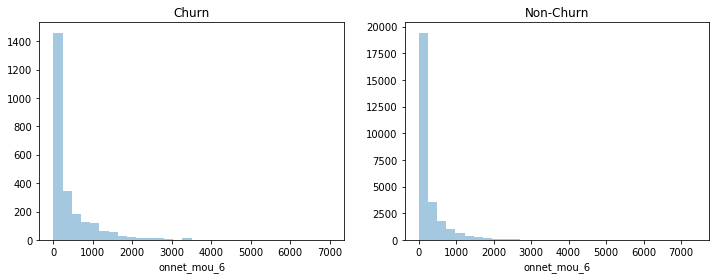

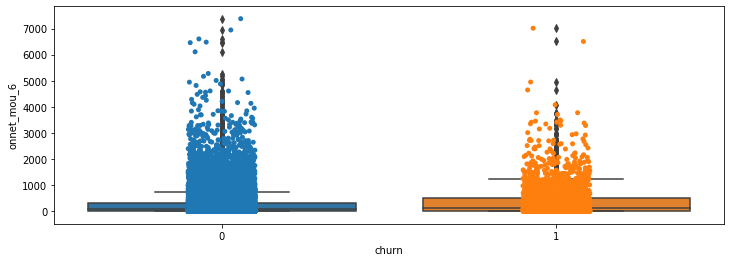

In [71]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='onnet_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='onnet_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [72]:
plt.show()

#### Offnet_mou (Calls outside of the operator network)

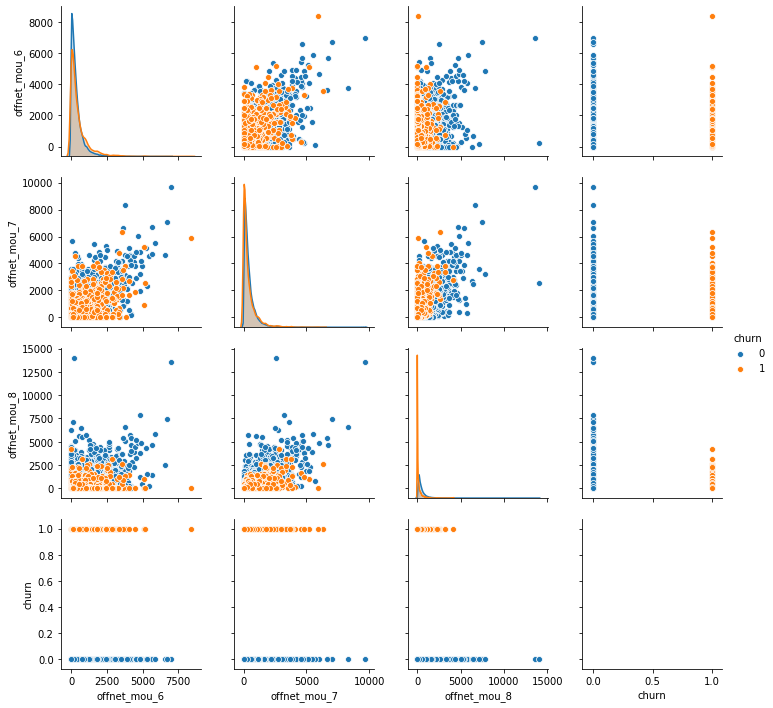

In [73]:
sns.pairplot(data=high_value_cust[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

In [74]:
plt.show()

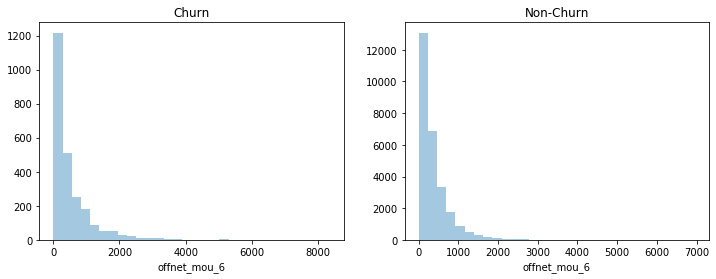

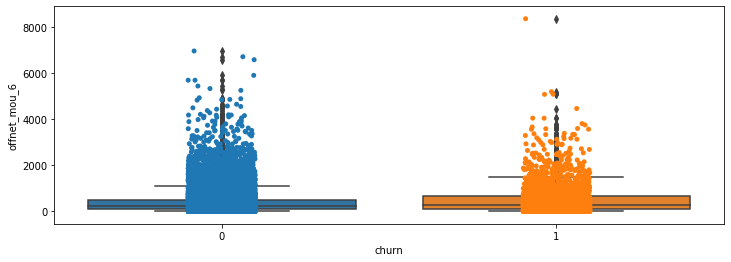

In [75]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='offnet_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='offnet_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [76]:
plt.show()

#### roam_ic_mou (Customer in roaming zone)

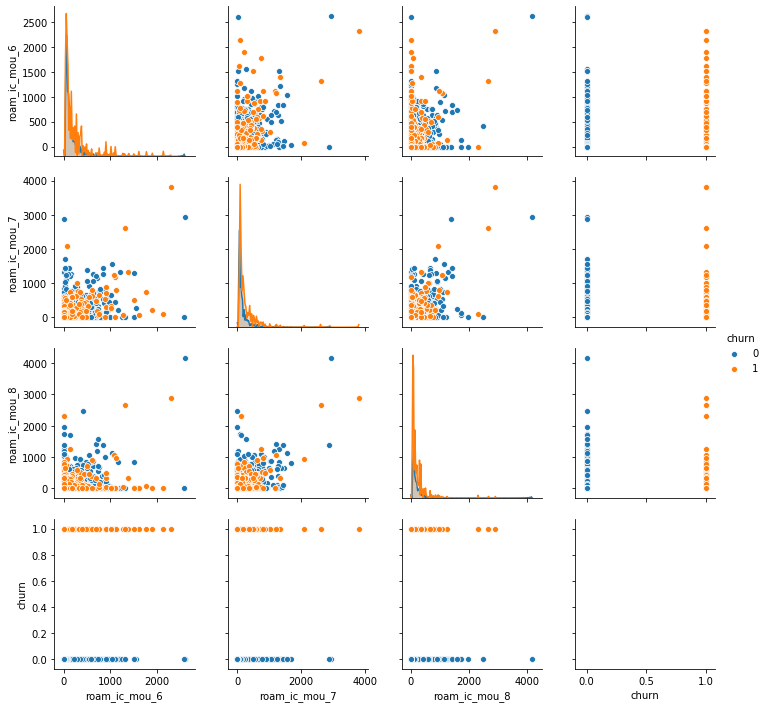

In [77]:
sns.pairplot(data=high_value_cust[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

In [78]:
plt.show()

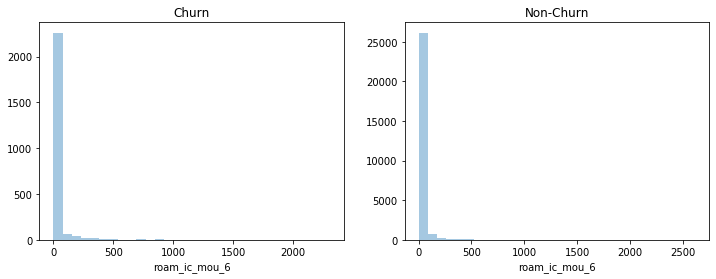

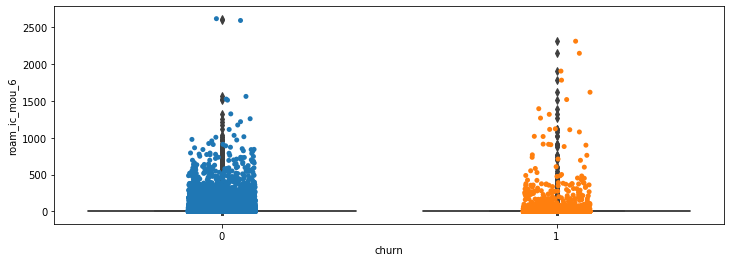

In [79]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='roam_ic_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='roam_ic_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [80]:
plt.show()

#### loc_og_mou (within the circle outgoing calls) 

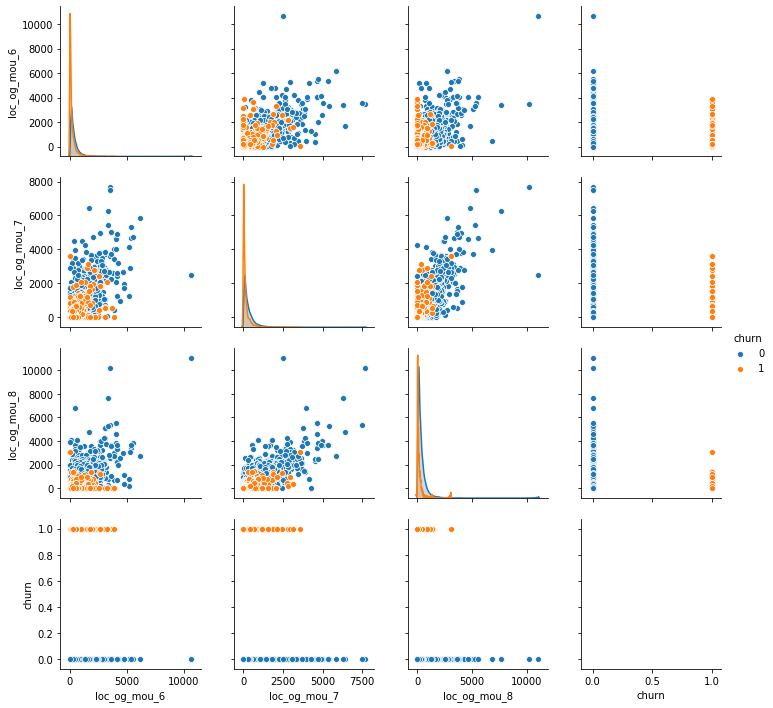

In [81]:
sns.pairplot(data=high_value_cust[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

In [82]:
plt.show()

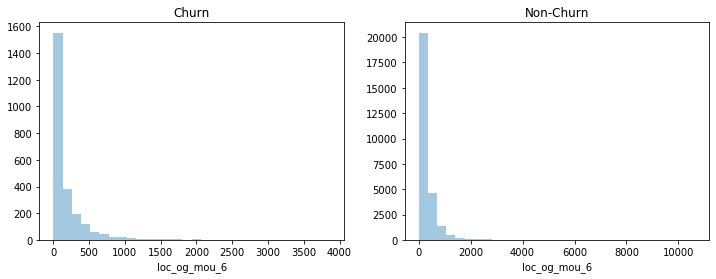

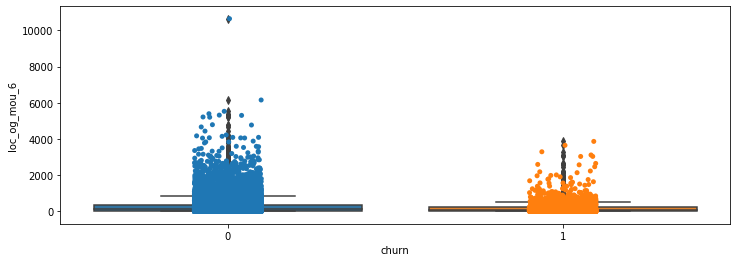

In [83]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='loc_og_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='loc_og_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [84]:
plt.show()

#### std_og_mou (Outside calling circle/zone calls)

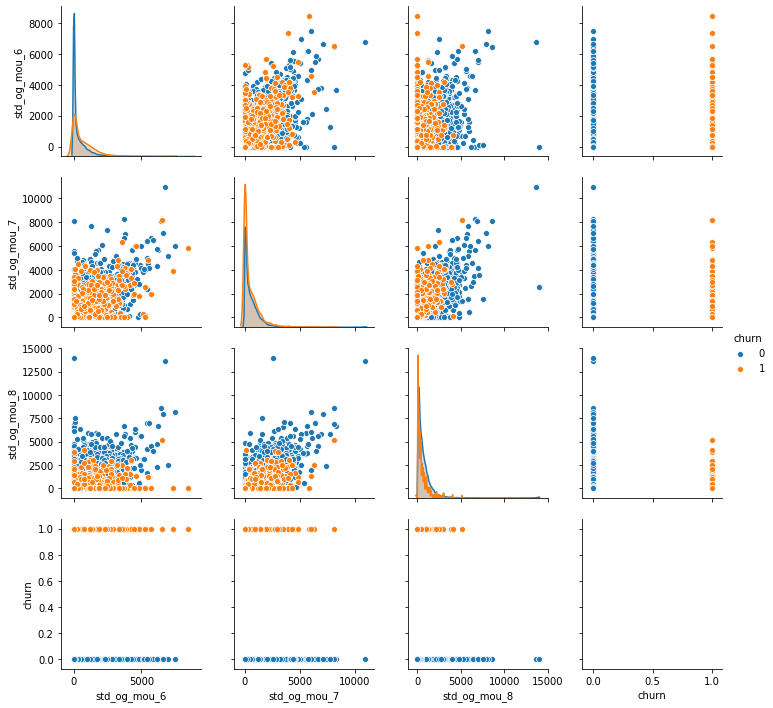

In [85]:
sns.pairplot(data=high_value_cust[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

In [86]:
plt.show()

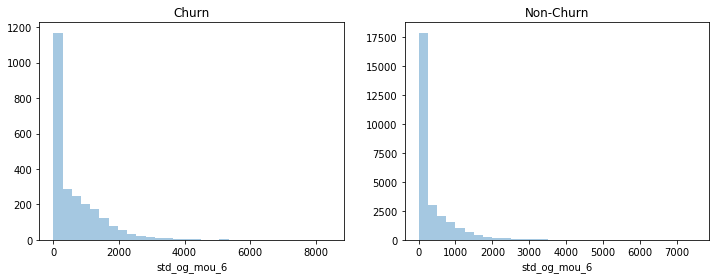

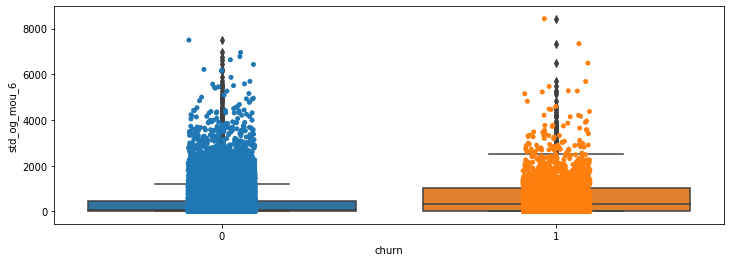

In [87]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='std_og_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='std_og_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [88]:
plt.show()

#### isd_og (international calling)

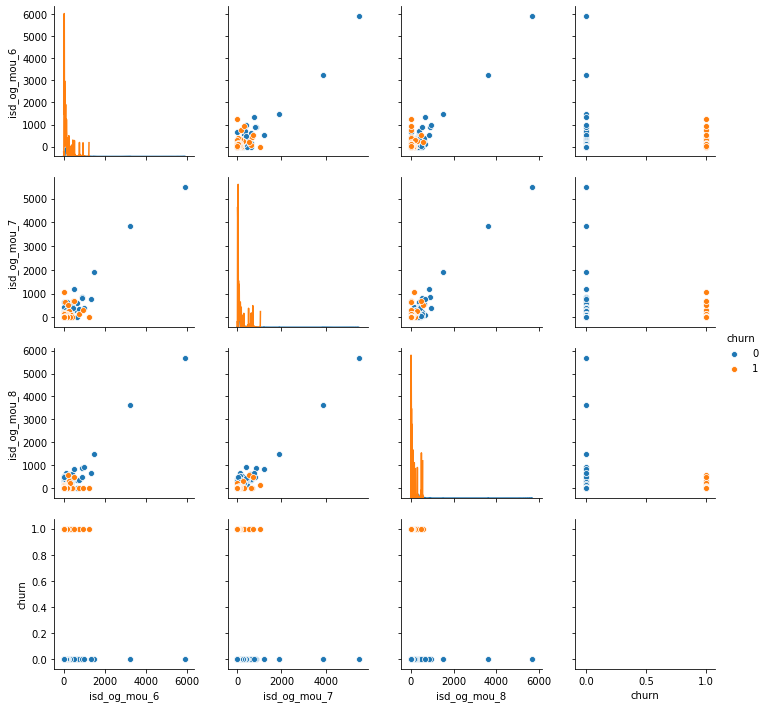

In [89]:
sns.pairplot(data=high_value_cust[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

In [90]:
plt.show()

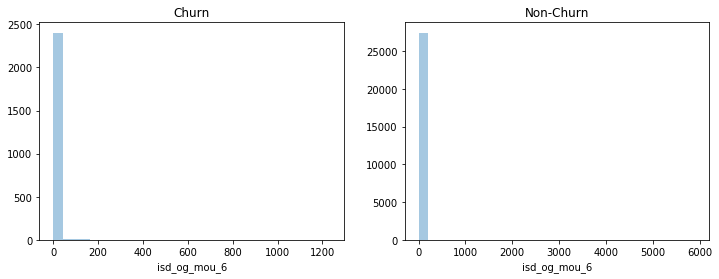

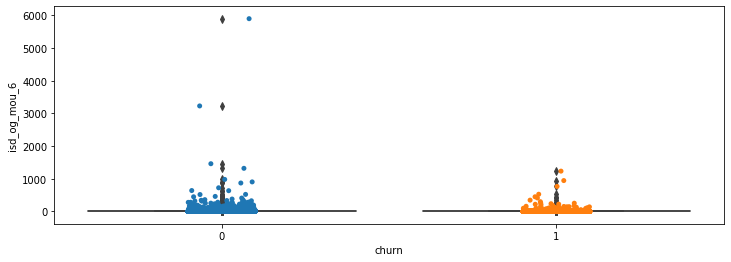

In [91]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='isd_og_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='isd_og_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [92]:
plt.show()

#### totalog (All outgoing calls by the customer)

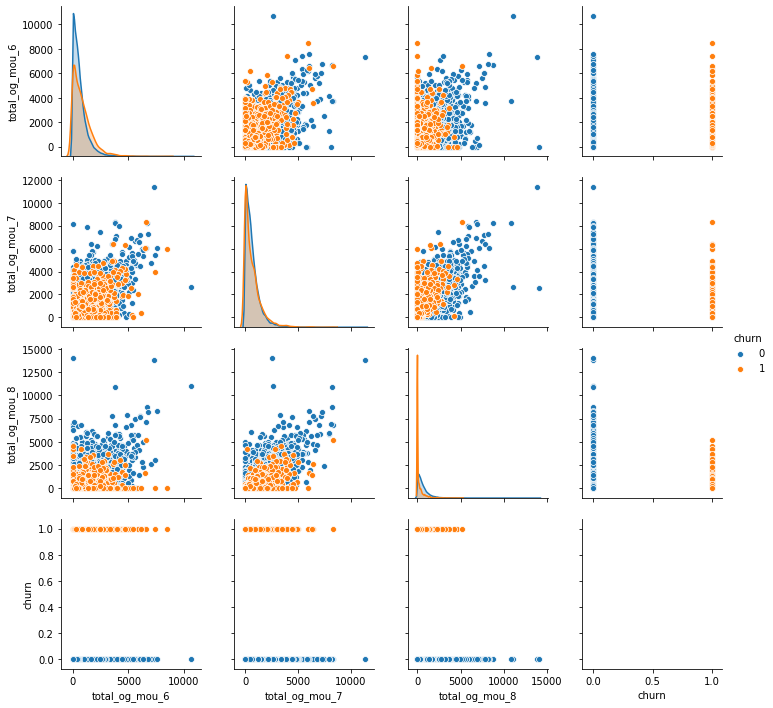

In [93]:
sns.pairplot(data=high_value_cust[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

In [94]:
plt.show()

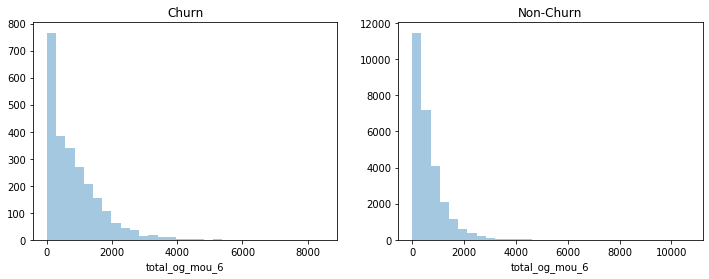

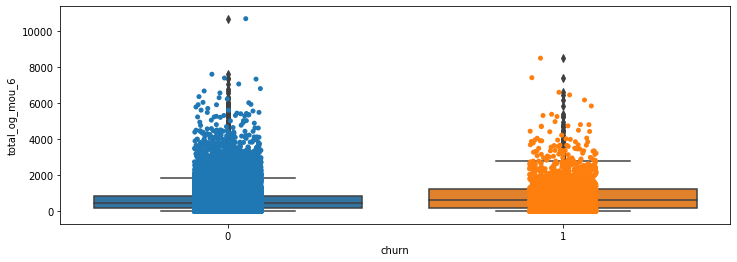

In [95]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_og_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='total_og_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [96]:
plt.show()

#### locic (incoming local calls) 

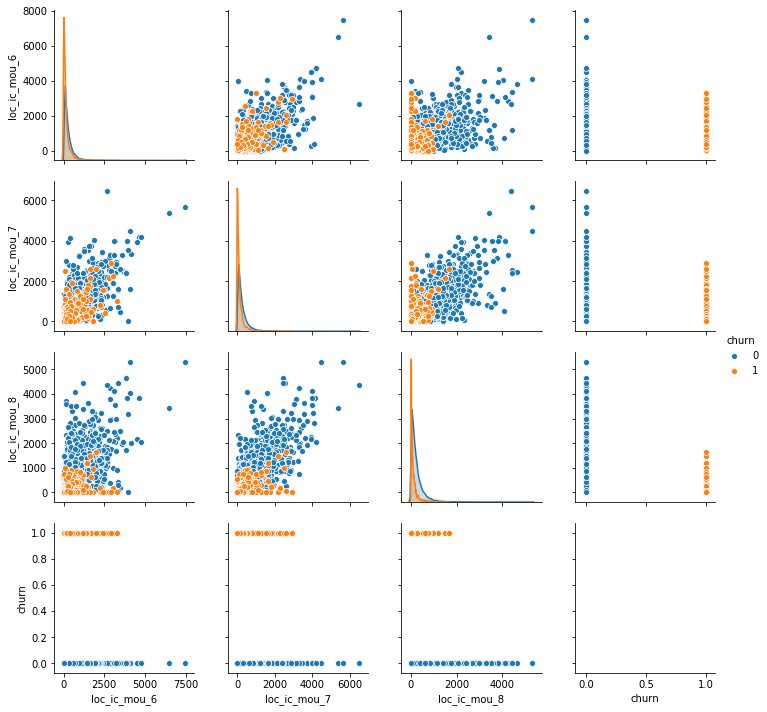

In [97]:
sns.pairplot(data=high_value_cust[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

In [98]:
plt.show()

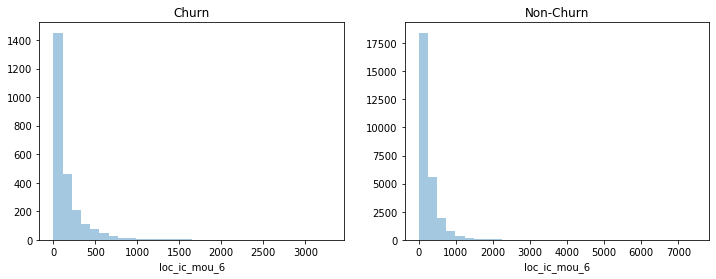

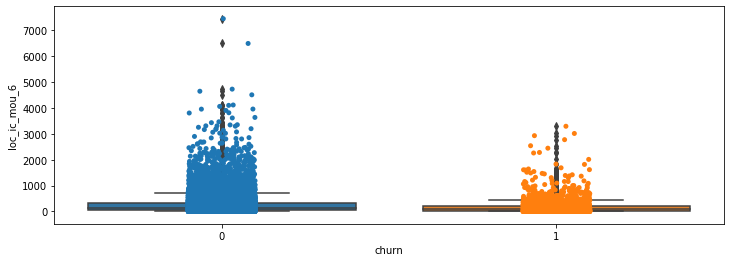

In [99]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='loc_ic_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='loc_ic_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [100]:
plt.show()

#### stdic (Outside circle incoming calls)

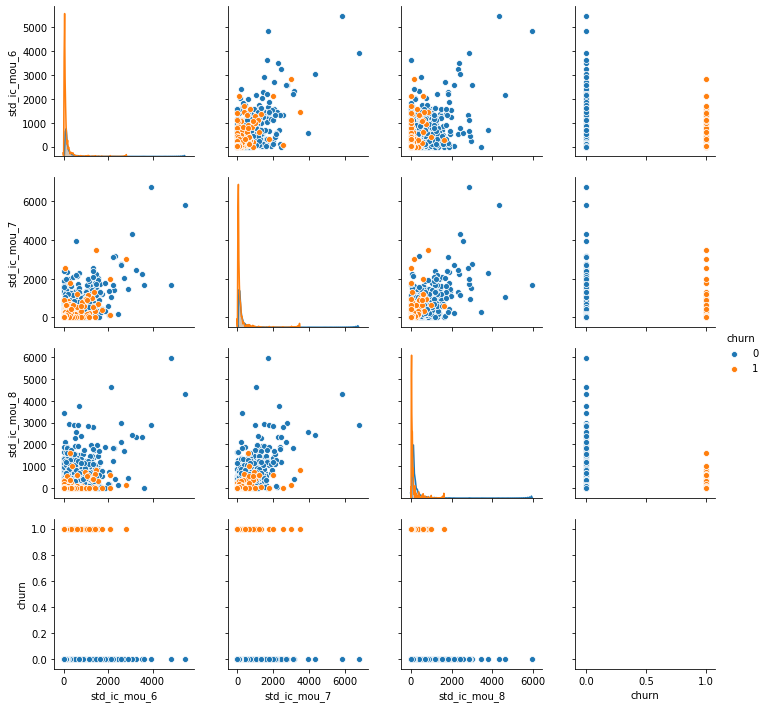

In [101]:
sns.pairplot(data=high_value_cust[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

In [102]:
plt.show()

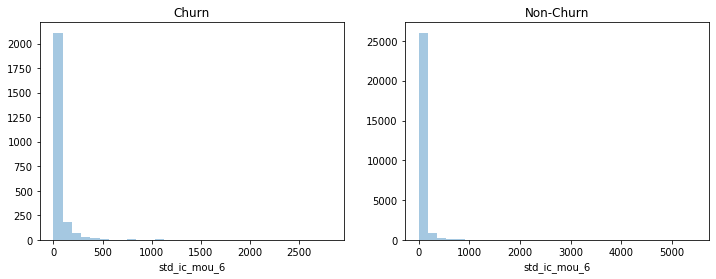

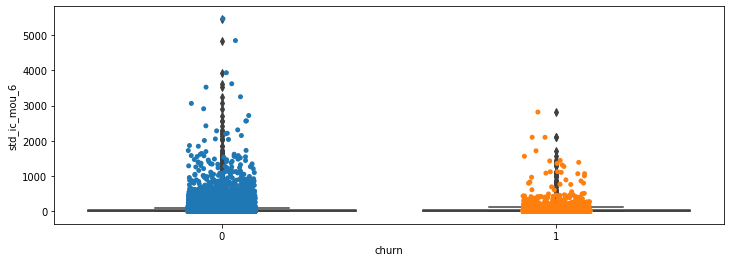

In [103]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='std_ic_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='std_ic_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [104]:
plt.show()

#### totalic (All incoming calls received by a person)

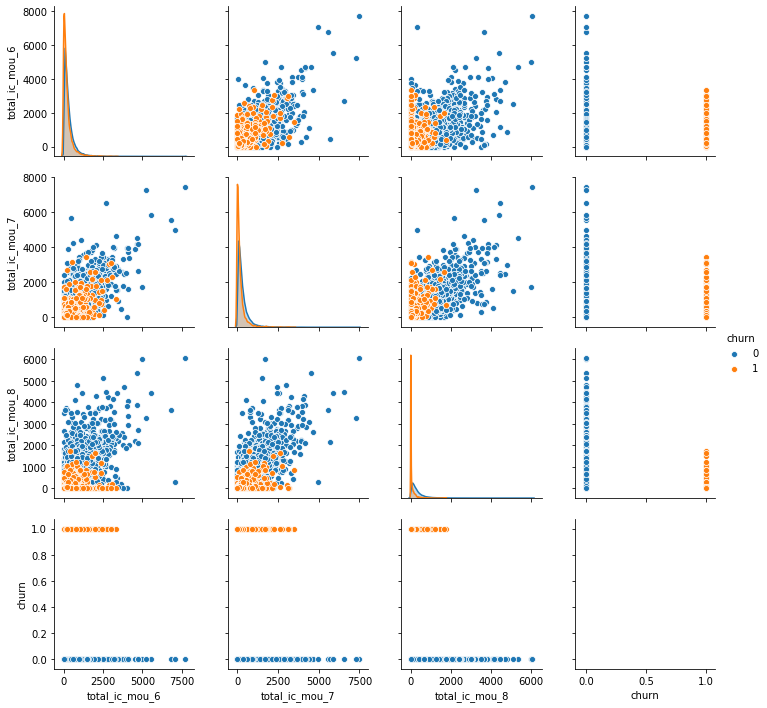

In [105]:

sns.pairplot(data=high_value_cust[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

In [106]:
plt.show()

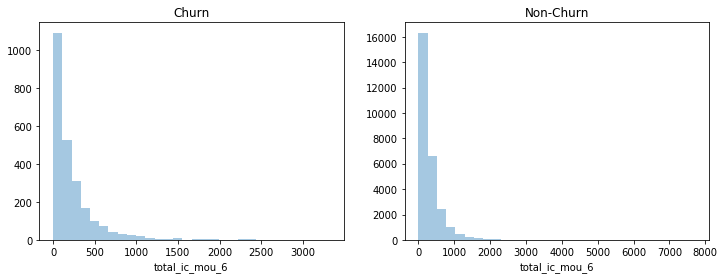

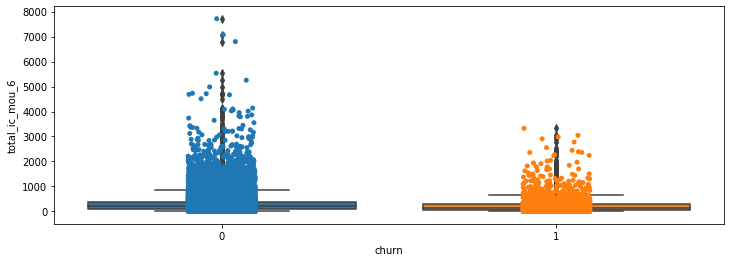

In [107]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_ic_mou_6', data=high_value_cust)
sns.stripplot(x='churn', y='total_ic_mou_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [108]:
plt.show()

#### total_rechnum
(Number of times a subscriber recharged his mobile)

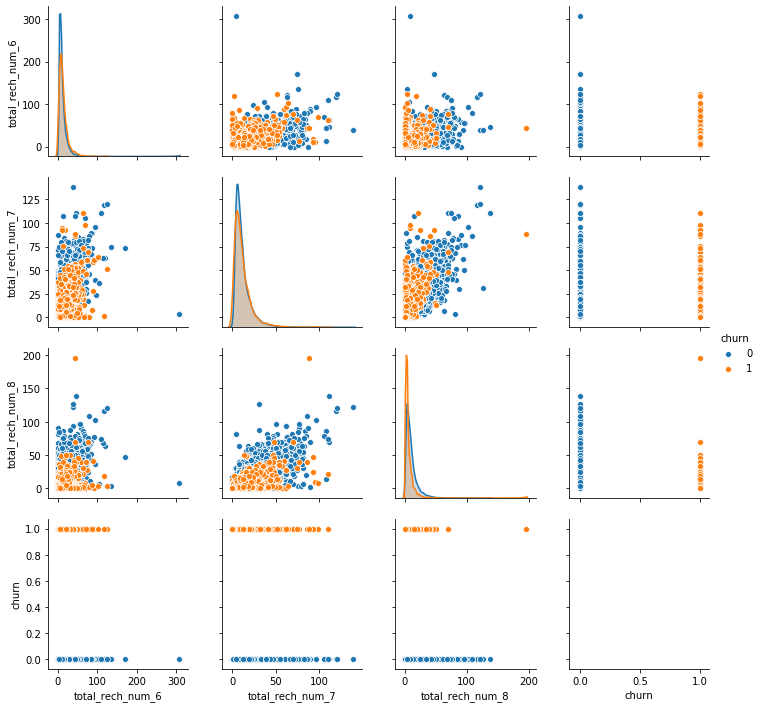

In [109]:
sns.pairplot(data=high_value_cust[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

In [110]:
plt.show()

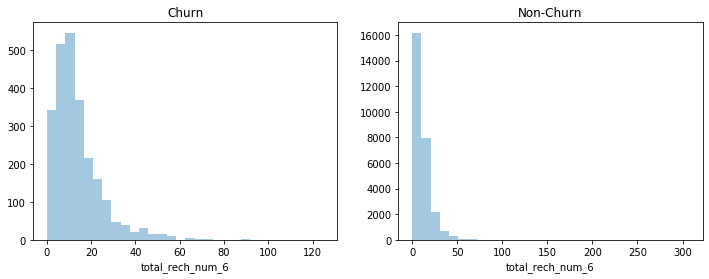

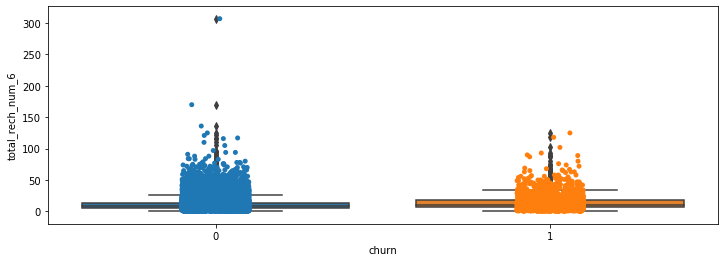

In [111]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_rech_num_6', data=high_value_cust)
sns.stripplot(x='churn', y='total_rech_num_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [112]:
plt.show()

#### total_rechamt
Total recharge amount in a particular month


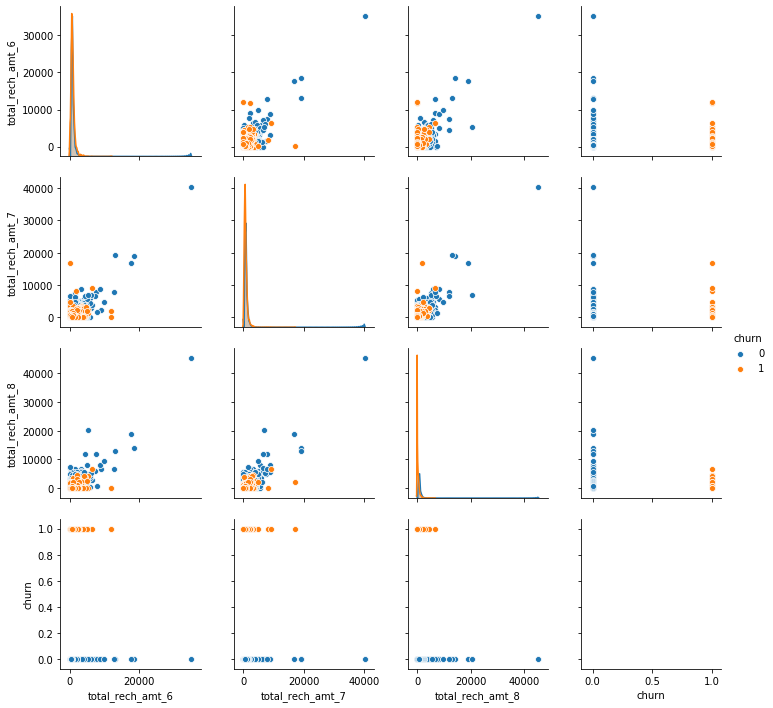

In [113]:
sns.pairplot(data=high_value_cust[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn')

In [114]:
plt.show()

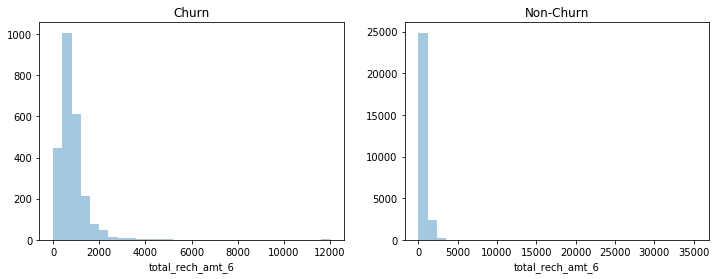

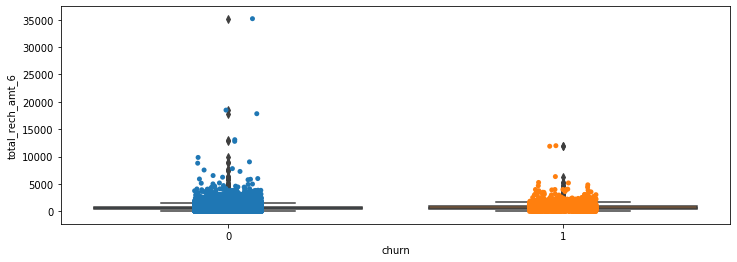

In [115]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_rech_amt_6', data=high_value_cust)
sns.stripplot(x='churn', y='total_rech_amt_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [116]:
plt.show()

#### total_rechdata
Total number of times mobile data has been recharged

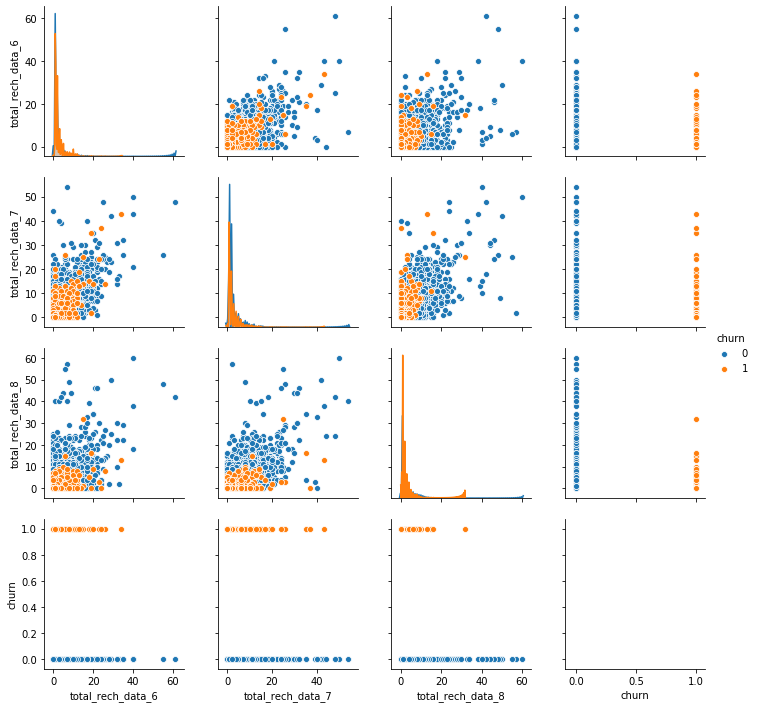

In [117]:
sns.pairplot(data=high_value_cust[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

In [118]:
plt.show()

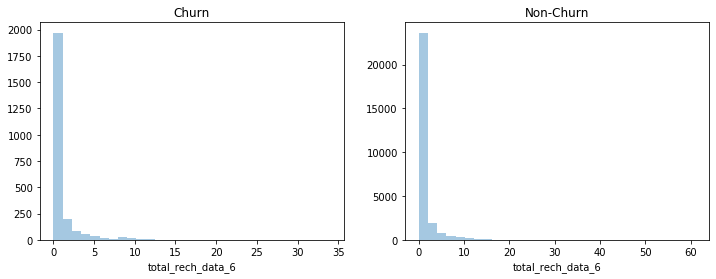

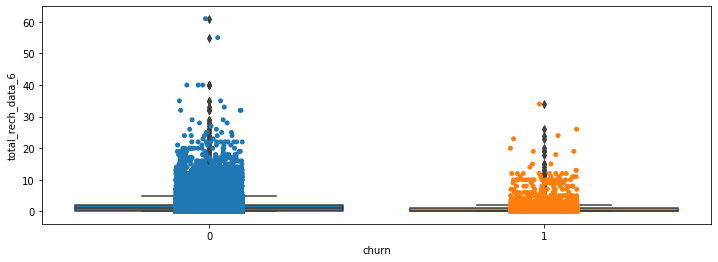

In [119]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].total_rech_data_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].total_rech_data_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_rech_data_6', data=high_value_cust)
sns.stripplot(x='churn', y='total_rech_data_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [120]:
plt.show()

#### vol_2gmb
Internet usage in MB

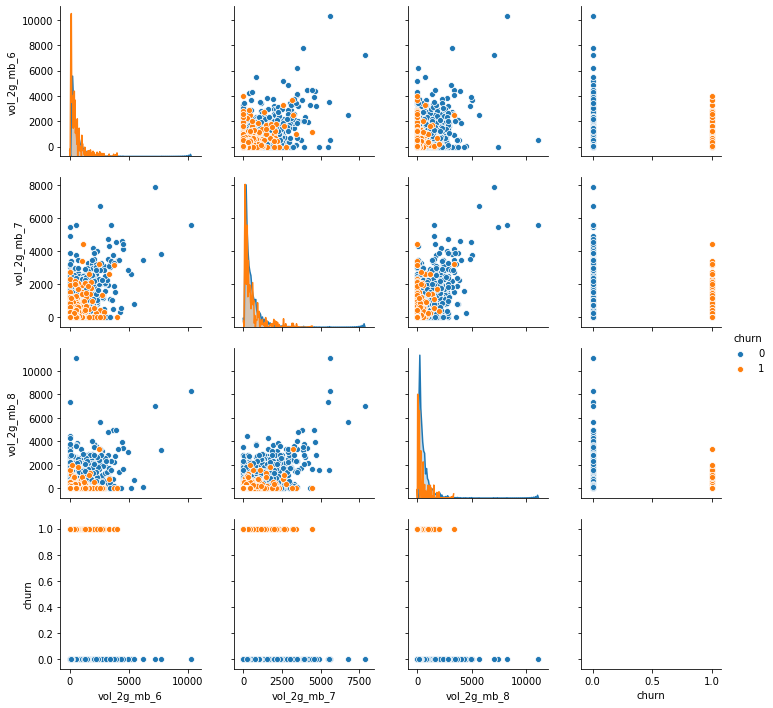

In [121]:

sns.pairplot(data=high_value_cust[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn']],hue='churn')

In [122]:
plt.show()

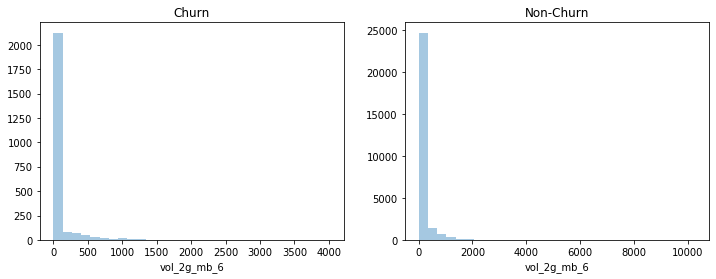

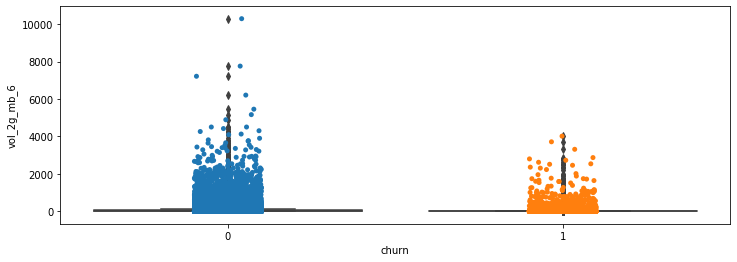

In [123]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='vol_2g_mb_6', data=high_value_cust)
sns.stripplot(x='churn', y='vol_2g_mb_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [124]:
plt.show()

#### vol_3gmb
Internet usage in MB

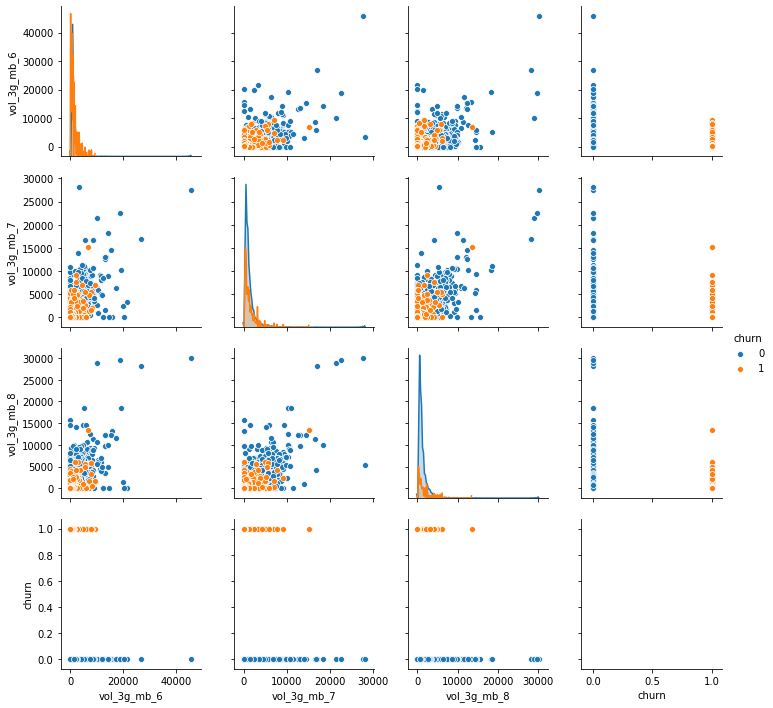

In [125]:
sns.pairplot(data=high_value_cust[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn']],hue='churn')

In [126]:
plt.show()

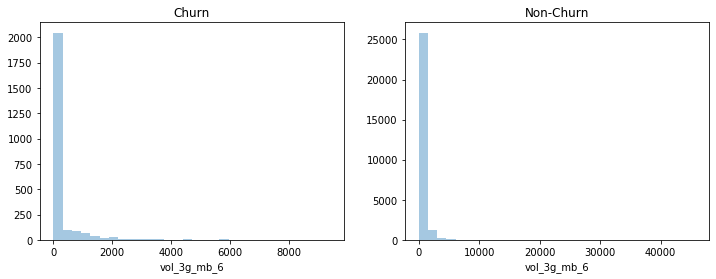

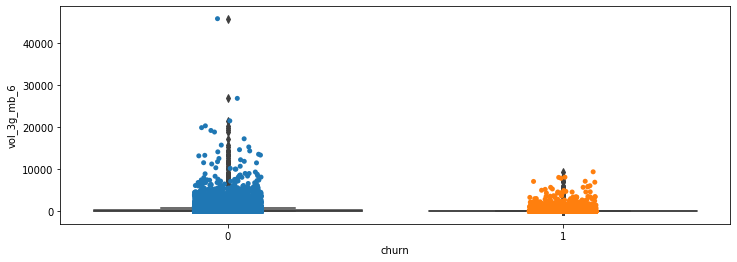

In [127]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='vol_3g_mb_6', data=high_value_cust)
sns.stripplot(x='churn', y='vol_3g_mb_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [128]:
plt.show()

#### vbc3g
Volume based cost - paid as per usage

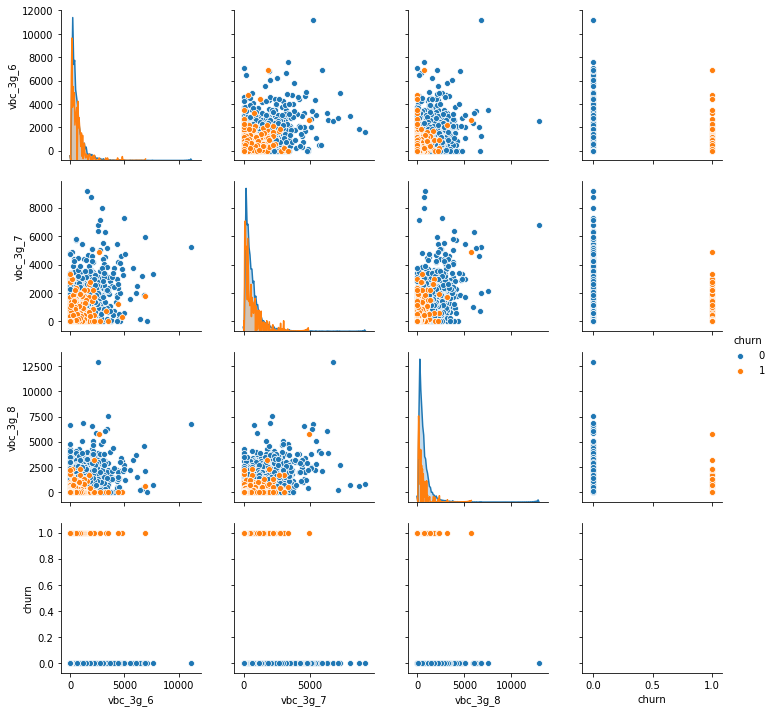

In [129]:
sns.pairplot(data=high_value_cust[['vbc_3g_6','vbc_3g_7','vbc_3g_8','churn']],hue='churn')

In [130]:
plt.show()

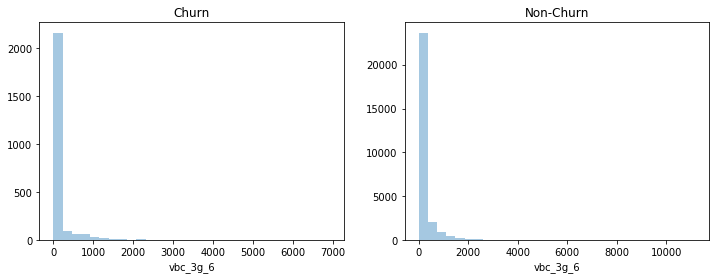

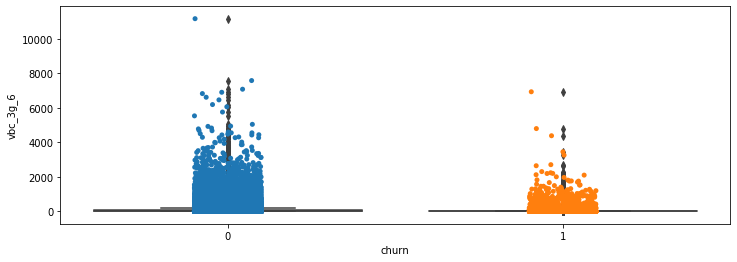

In [131]:
ig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_value_cust[high_value_cust['churn']==1].vbc_3g_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_value_cust[high_value_cust['churn']==0].vbc_3g_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='vbc_3g_6', data=high_value_cust)
sns.stripplot(x='churn', y='vbc_3g_6', data=high_value_cust, jitter=True, edgecolor="gray")

In [132]:
plt.show()

In [133]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 178 entries, mobile_number to rech_data_8
dtypes: category(12), datetime64[ns](9), float64(129), int64(28)
memory usage: 39.8 MB


In [134]:
high_value_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            2014-06-30           2014-07-31           2014-08-31   197.385   
7            2014-06-30           2014-07-31           2014-08-31  1069.180   
8            2014-06-30           2014-07-31           2014-08-31   378.721   
16           2014-06-30           2014-07-31           2014-08-31   430.975   
21           2014-06-30           2014-07-31           2014-08-31   514.453   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
16   299.869   187.894        50.51        74.01        70.61        296.29   
21   597.753   637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
16        229.74        162.76           0.00           2.83           0.00   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
16           0.00          17.74           0.00             42.61   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
16             65.16             67.38            273.29            145.99   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
16            128.28              0.00              4.48             10.26   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
16               0.0               0.0              0.00        315.91   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
16        215.64    

In [135]:
high_value_cust = high_value_cust.select_dtypes(exclude=['datetime64'])
high_value_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
16   430.975   299.869   187.894        50.51        74.01        70.61   
21   514.453   597.753   637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16             10.26               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
21          

In [136]:
high_value_cust.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.994900e+04    29949.0         29949.0         29949.0   
mean    7.001216e+09      109.0             0.0             0.0   
std     6.867758e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000631e+09      109.0             0.0             0.0   
50%     7.001221e+09      109.0             0.0             0.0   
75%     7.001806e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29949.0  29949.000000  29949.000000  29949.000000  29949.000000   
mean              0.0    577.006877    578.921924    525.105455    276.501375   
std               0.0    449.261901    469.335744    496.373165    461.202260   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
25%               0.0    345.808000    347.071000    266.252000     26.410000   
50%               0.0    490.933000    489.043000    443.470000    102.690000   
75%               0.0    702.776000    700.512000    666.980000    319.590000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29949.000000  29949.000000  29949.000000  29949.000000  29949.000000   
mean     284.502051    248.826141    393.905095    398.808925    352.778474   
std      483.088197    462.953151    478.888295    494.947243    480.726120   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       25.540000     16.930000     98.510000     96.210000     66.890000   
50%      100.530000     79.680000    251.340000    247.640000    209.510000   
75%      322.760000    265.710000    507.610000    512.380000    459.710000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29949.000000   29949.000000   29949.000000   29949.000000   
mean       16.762548      13.064450      12.935777      27.846859   
std        77.987846      75.891264      74.540335     117.450921   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29949.000000   29949.000000      29949.000000      29949.000000   
mean       21.028152      20.624408         89.380138         90.486707   
std        97.074048     105.306013        233.327427        246.131386   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          6.160000          6.640000   
50%         0.000000       0.000000         28.410000         28.530000   
75%         0.000000       0.000000         84.340000         84.910000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29949.000000      29949.000000      29949.000000      29949.000000   
mean          82.295146        171.751292        171.409086        159.126265   
std          231.761888        250.655183        241.535200        234.488226   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.960000         24.540000         26.940000         17.760000   
50%           24.540000         87.610000         89.890000         78.030000   
75%           77.760000        223.110000        221.960000        209.540000   
max        1075

# Model Creation

In [137]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import sensitivity_specificity_support



## Test Train Splitting (70:30 ratio)

In [161]:
# divide data into train and test
X = high_value_cust.drop("churn", axis = 1)
y = high_value_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 100)

## Performing PCA for dimentionality reduction

In [162]:
# Standardization and PCA 
scaler = StandardScaler()
X = X_train.copy()
x = scaler.fit_transform(X)
x

array([[ 1.39430009,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.93332471,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.60958733,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.30488518,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.37272988,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.480822  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [163]:
pca = PCA(random_state=42)

In [164]:
pca.fit(x)

PCA(random_state=42)

In [165]:
pca.components_

array([[-1.90960655e-03,  1.52655666e-16, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.22257517e-02, -3.33066907e-16,  3.33066907e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.67896322e-02,  4.44089210e-16,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  7.90600875e-04,  5.36658122e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.00026664e-04, -1.98266973e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -1.08046808e-03,  3.14871657e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [166]:
# calculating the explained variance ratio of above components

pca.explained_variance_ratio_

array([1.20760376e-01, 8.59207540e-02, 6.56935947e-02, 5.50625986e-02,
       3.82711500e-02, 3.47455341e-02, 2.96380857e-02, 2.75020413e-02,
       2.44951900e-02, 2.26701827e-02, 2.08757840e-02, 1.96460134e-02,
       1.83972938e-02, 1.82722543e-02, 1.70966036e-02, 1.68912691e-02,
       1.61971230e-02, 1.46210917e-02, 1.38590613e-02, 1.35101175e-02,
       1.29768576e-02, 1.18651429e-02, 1.10777907e-02, 1.09158982e-02,
       1.04568434e-02, 9.58416174e-03, 8.75981457e-03, 8.56109027e-03,
       8.16103355e-03, 7.72541738e-03, 7.63017327e-03, 7.47535240e-03,
       7.28499974e-03, 7.12158891e-03, 6.90519405e-03, 6.34583494e-03,
       6.11535992e-03, 6.06862305e-03, 5.98320658e-03, 5.81895236e-03,
       5.50014137e-03, 5.38899954e-03, 5.23220881e-03, 5.21325819e-03,
       5.13272352e-03, 4.86292162e-03, 4.74628955e-03, 4.56581893e-03,
       4.36372461e-03, 4.17770788e-03, 4.05102403e-03, 3.90895957e-03,
       3.82334619e-03, 3.79071434e-03, 3.57276825e-03, 3.43570468e-03,
      

<BarContainer object of 168 artists>

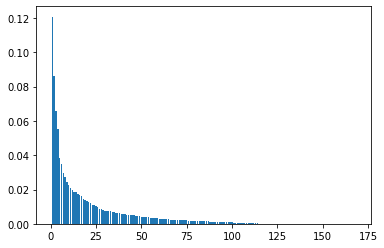

In [167]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [168]:
# Calcualting cumulative variance
cumu_variance = np.cumsum(pca.explained_variance_ratio_)


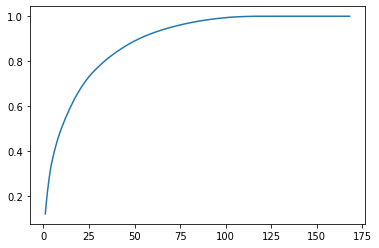

In [169]:
#plotting cumulative variance to choose optimal number of components
plt.plot(range(1,len(cumu_variance)+1), cumu_variance)

#### PCA with 100 components

In [170]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=100)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20964, 100)

In [171]:
#Hence, dimentionality has been reduced.

In [172]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [173]:
corrmat.shape

(100, 100)

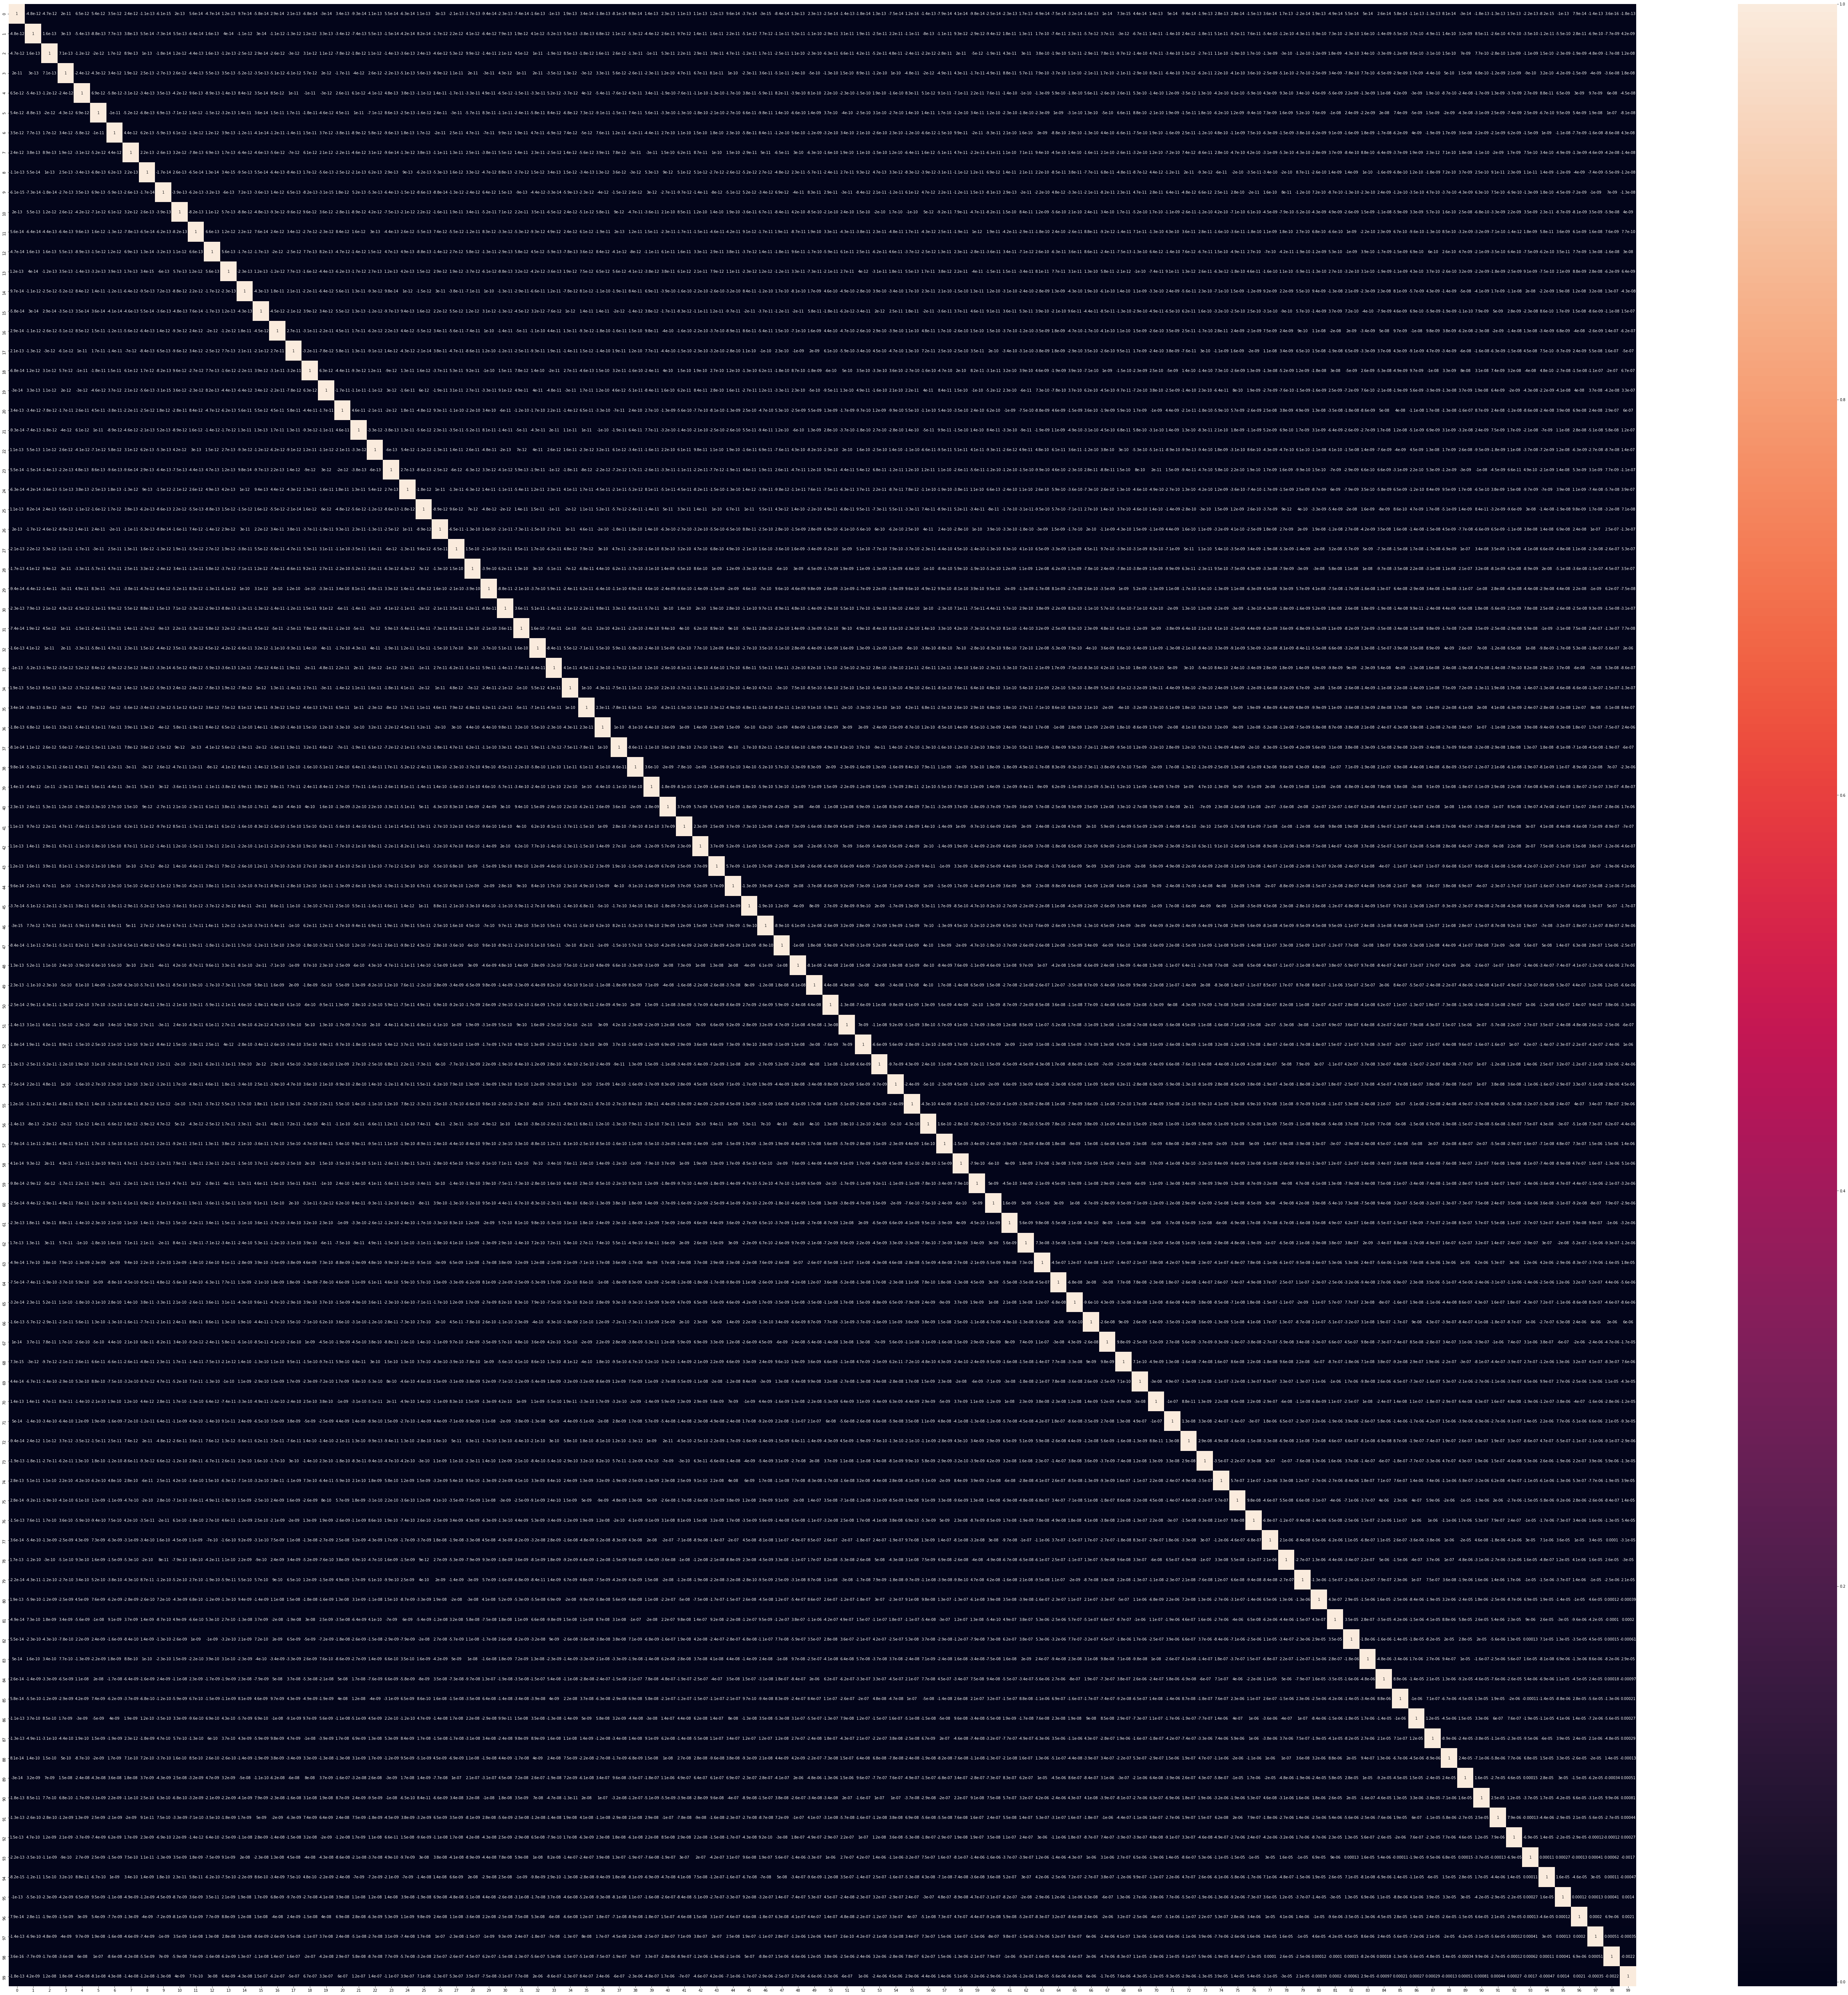

In [174]:
plt.figure(figsize=[100,100])
sns.heatmap(corrmat, annot=True)

In [175]:
#Fitting on test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8985, 100)

## Performing Logistic Regression and predicting values on test set

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
learner_pca = LogisticRegression()

In [178]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [179]:
#Predicting on test data
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [180]:
#Calculating Are-Under_curve valve
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.85'

In [181]:
y_pred = model_pca.predict(df_test_pca)
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[4573 3679]
 [  73  660]]


###### We can see that it predicts really well.

## Class Imbalance

In [208]:
# Redoing PCA
pca = PCA()

# logistic regression with class_weight to process class imbalance
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# Starting with pipeline
pipe = [("scaler", StandardScaler()),("pca", pca),("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(pipe)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [209]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [210]:
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.078112      0.061401         0.000000        0.000000   
1        2.369531      0.036187         0.000000        0.000000   
2        2.301573      0.041442         0.169496        0.005532   
3        2.636365      0.040160         0.168895        0.004602   
4        2.083106      0.034911         0.000000        0.000000   
5        2.362334      0.028148         0.000000        0.000000   
6        2.281585      0.037426         0.167696        0.007077   
7        2.694529      0.058801         0.175693        0.006492   
8        2.023543      0.031511         0.000000        0.000000   
9        2.324958      0.015333         0.000000        0.000000   
10       2.266195      0.032605         0.162699        0.004871   
11       2.695728      0.056962         0.170294        0.009021   
12       2.000359      0.015348         0.000000        0.000000   
13       2.277788      0.023964         0.000000        0.000000   
14       2.262596      0.040660         0.170296        0.007166   
15       2.759288      0.048705         0.173095        0.006879   
16       2.026144      0.010511         0.000000        0.000000   
17       2.325555      0.023164         0.000000        0.000000   
18       2.285182      0.022830         0.167296        0.006148   
19       2.768882      0.131941         0.169295        0.004406   
20       2.030940      0.030852         0.000000        0.000000   
21       2.290980      0.014241         0.000000        0.000000   
22       2.279387      0.039265         0.175291        0.003072   
23       2.895804      0.269105         0.199277        0.036102   
24       2.178847      0.149534         0.000000        0.000000   
25       2.402909      0.066054         0.000000        0.000000   
26       2.381521      0.018220         0.175093        0.009446   
27       2.779674      0.109468         0.166897        0.005654   
28       2.030940      0.007246         0.000000        0.000000   
29       2.322160      0.015936         0.000000        0.000000   
30       2.301373      0.029419         0.166497        0.004268   
31       2.448881      0.348751         0.137315        0.029893   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [211]:
# print best hyperparameters
print("Highest AUC: ", model.best_score_)
print("Optimal hyperparameters: ", model.best_params_)

Highest AUC:  0.8933627588569376
Optimal hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [212]:
# predict churn on test data
y_pred = model.predict(X_test)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area-under-curve value again
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ",roc_auc_score(y_test, y_pred_prob))

Sensitivity: 	0.77
Specificity: 	0.86
AUC:  0.8839428070354105


## Testing across other models

#### Random Forests

In [213]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {"criterion":['gini'],
    'max_features': ['auto', 0.5]
}
#Creating folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds,scoring='roc_auc', n_jobs = -1,verbose = 1)

In [214]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_features': ['auto', 0.5]},
             scoring='roc_auc', verbose=1)

In [215]:
print("Optimal AUC: ", model.best_score_)
print("Ideal hyperparameters: ", model.best_params_)

Optimal AUC:  0.8933627588569376
Ideal hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [216]:
# predict churn on test data
y_pred = model.predict(X_test)

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area-under-curve value for random forests on test dataset
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_prob))

Sensitivity: 	0.77
Specificity: 	0.86
AUC: 0.8839428070354105


##### Since it has similar metric scores, and this is classification problem, we shall choose Random Forest model and find its best features as well.

# Choosing Best Features

In [217]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [218]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [219]:
# OOB score
rf_model.oob_score_

0.9433314253005152

In [220]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8153   99]
 [ 419  314]]
Sensitivity: 	0.43
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [221]:
# Feature Importance Calculation
features = high_value_cust.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0        total_ic_mou_8               5.888028
1          loc_ic_mou_8               5.861455
2      loc_ic_t2m_mou_8               4.306692
3    last_day_rch_amt_8               3.482757
4      loc_og_t2m_mou_8               3.433678
5                arpu_8               3.246992
6         roam_og_mou_8               3.112457
7        total_og_mou_8               3.076007
8      loc_og_t2t_mou_8               2.901849
9      total_rech_amt_8               2.819115
10        roam_ic_mou_8               2.497740
11     loc_ic_t2t_mou_8               2.465054
12         loc_og_mou_8               2.290772
13         std_ic_mou_8               1.580816
14   av_rech_amt_data_8               1.544067
15       max_rech_amt_8               1.541384
16     loc_ic_t2f_mou_8               1.502666
17         offnet_mou_8               1.303015
18          vol_2g_mb_8               1.057131
19          onnet_mou_8               0.894840
20                  aon               0.848223
21               arpu_7               0.847970
22      max_rech_data_8               0.836579
23         std_og_mou_8               0.781761
24          vol_3g_mb_8               0.768922
25     std_ic_t2m_mou_8               0.758470
26     loc_og_t2f_mou_8               0.721712
27     std_og_t2m_mou_8               0.693922
28        mobile_number               0.672551
29               arpu_6               0.671672
30         loc_ic_mou_7               0.670436
31     total_rech_amt_7               0.669611
32     loc_ic_t2m_mou_6               0.653989
33     total_rech_num_8               0.644417
34     loc_ic_t2t_mou_7               0.626434
35     loc_ic_t2m_mou_7               0.626378
36     total_rech_amt_6               0.625524
37         std_og_mou_7               0.619286
38       total_ic_mou_6               0.607564
39         offnet_mou_6               0.605491
40       total_og_mou_7               0.599927
41       total_ic_mou_7               0.595325
42         offnet_mou_7               0.580193
43     std_ic_t2t_mou_8               0.577581
44         loc_og_mou_7               0.573214
45         std_og_mou_6               0.564399
46       total_og_mou_6               0.562296
47         loc_ic_mou_6               0.558340
48     loc_og_t2m_mou_6               0.552161
49     loc_og_t2m_mou_7               0.548089
50     total_rech_num_7               0.525366
51          onnet_mou_7               0.514546
52          onnet_mou_6               0.514333
53     loc_og_t2t_mou_7               0.499571
54     loc_ic_t2f_mou_7               0.487611
55         loc_og_mou_6               0.483289
56     total_rech_num_6               0.481567
57     std_og_t2m_mou_7               0.472785
58            arpu_3g_8               0.467037
59     std_og_t2m_mou_6               0.465154
60    total_rech_data_8               0.461287
61     loc_ic_t2t_mou_6               0.461204
62     std_og_t2t_mou_7               0.459202
63         std_ic_mou_7               0.449915
64             vbc_3g_8               0.448250
65     loc_og_t2t_mou_6               0.447758
66     std_ic_t2m_mou_6               0.434734
67       max_rech_amt_7               0.426027
68     std_og_t2t_mou_6               0.418027
69     std_ic_t2m_mou_7               0.413893
70         spl_og_mou_7               0.410553
71         std_ic_mou_6               0.405423
72        roam_ic_mou_7               0.399489
73       max_rech_amt_6               0.396858
74     night_pck_user_8               0.391434
75     loc_ic_t2f_mou_6               0.388000
76   last_day_rch_amt_7               0.383000
77     std_ic_t2f_mou_8               0.381478
78   last_day_rch_amt_6               0.354411
79        roam_og_mou_7               0.349015
80     loc_og_t2f_mou_6               0.340624
81         spl_og_mou_8               0.320693
82         spl_og_mou_6               0.320644
83     std_ic_t2t_mou_7               0.313398
84     std_og_t2t_m

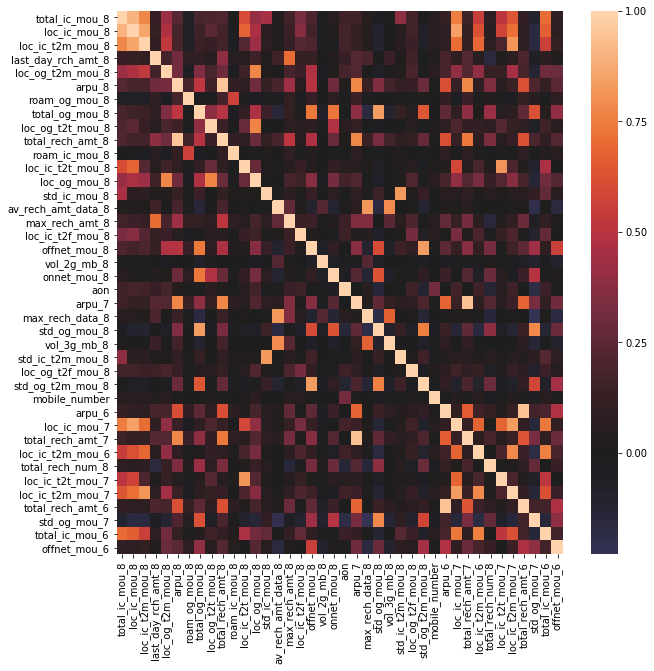

In [235]:
#Plotting correlation matrix
top_features = feature_importance.variables[0:40]
sns.heatmap(data=X_train[top_features].corr(), annot=False)

###### Picking the best features from the top 10 features of the feature importance list , and comparing them with the ones with high correlation from the above plot.

In [237]:
best_features = ['total_ic_mou_8','loc_ic_mou_8','loc_ic_t2m_mou_8','last_day_rch_amt_8','loc_og_t2m_mou_8','arpu_8','roam_og_mou_8','total_og_mou_8','loc_og_t2t_mou_8','total_rech_amt_8']
X_train = X_train[best_features]
X_test = X_test[best_features]

### Modelling a logistic regression model as before with the new feature set

In [238]:
lr = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]
logistic = Pipeline(lr)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [239]:
# fit model on new featrure sets
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [240]:
# print Optimal hyperparameters
print("Optimal AUC: ", model.best_score_)
print("Optimal hyperparameters: ", model.best_params_)


# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Optimal AUC:  0.8635112438682837
Optimal hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2'}
[[6481 1771]
 [ 158  575]]
Sensitivity: 	0.78
Specificity: 	0.79
ROC:    	 0.86


### Analysing the feature coeffs from the above model

In [246]:
lr_model = model.best_estimator_.named_steps['logistic']

# intercept
intercept_df = pd.DataFrame(lr_model.intercept_.reshape((1,1)), columns = ['intercept'])

# coefficients
coeff = logistic_model.coef_.reshape((10, 1)).tolist()
coeff = [val for sublist in coeff for val in sublist]
coeff = [round(coeff, 3) for coeff in coeff]

lr_features = list(X_train.columns)
coeffs_df = pd.DataFrame(logistic_model.coef_, columns=lr_features)



coeffs_df

total_ic_mou_8  loc_ic_mou_8  loc_ic_t2m_mou_8  last_day_rch_amt_8  \
0       -0.724195     -0.725324          -0.18869           -0.543402   

   loc_og_t2m_mou_8    arpu_8  roam_og_mou_8  total_og_mou_8  \
0         -0.266871 -0.176583       0.382734       -0.075073   

   loc_og_t2t_mou_8  total_rech_amt_8  
0          -0.18142         -0.632786

In [244]:
intercept_df

intercept
0  -1.433298

# Conclusions:

## - From the above coefficients, we can infer that, to reduce churn we have to increase campaigning in the following aspects of users,
### 1) Total incoming usage during August, hence campaigns should be planned leading up to this month.
### 2) Local incoming usage during August and calls which are made to other operators.  

## - We also have to decrease,
###  1)Roaming outgoing charges leading upto August as it is positively correlating with churn.
